In [74]:
import pandas as pd
import cv2
import matplotlib
import matplotlib.pyplot as plt


In [75]:
pip install opencv-python

In [76]:
#Read the data 
data = pd.read_csv("m-external.csv", header=0,
                   index_col=0, parse_dates=True, squeeze=True)

C:\Users\offic\AppData\Local\Temp\ipykernel_9064\2242861156.py:2: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  data = pd.read_csv("m-external.csv", header=0,


In [77]:
data.head()

,Interest_Rate,Inflation_rate
DATE,,
2000-01-01,3.411051,1.76
2000-02-01,3.513343,1.91
2000-03-01,3.440347,1.87
2000-04-01,3.202967,1.78
2000-05-01,3.360531,1.66


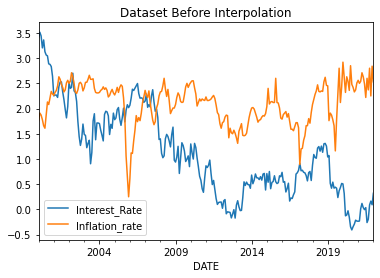

In [95]:
#Orginal Dataset
data.plot()
plt.title("Dataset Before Interpolation")
plt.show()

In [79]:
# Use resample function to upsample months 
# to days using the mean sales of month
upsampled = data.resample('D').mean()

In [80]:
upsampled

,Interest_Rate,Inflation_rate
DATE,,
2000-01-01,3.411051,1.76
2000-01-02,NaN,NaN
2000-01-03,NaN,NaN
2000-01-04,NaN,NaN
2000-01-05,NaN,NaN
...,...,...
2021-12-28,NaN,NaN
2021-12-29,NaN,NaN
2021-12-30,NaN,NaN


In [86]:
df  = upsampled.interpolate(method='spline', order=2)


In [91]:
df .head()

,Interest_Rate,Inflation_rate
DATE,,
2000-01-01,3.411051,1.760000
2000-01-02,2.796146,2.488276
2000-01-03,2.795518,2.488011
2000-01-04,2.794891,2.487746
2000-01-05,2.794264,2.487482


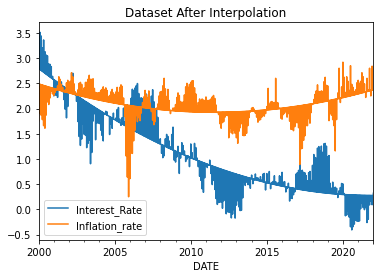

In [94]:
#Interpolated Dataset
df.plot()
plt.title("Dataset After Interpolation")
plt.show()



In [89]:
#Writing a Pandas DataFrame to CSV file
df.to_csv('interpolated2.csv')

